In [1]:
import numpy as np
import pandas as pd 

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')



In [5]:
len(train)

1460

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: >

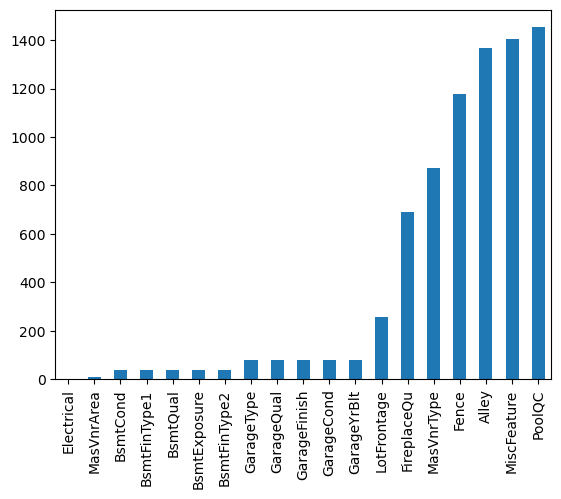

In [3]:
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

<Axes: >

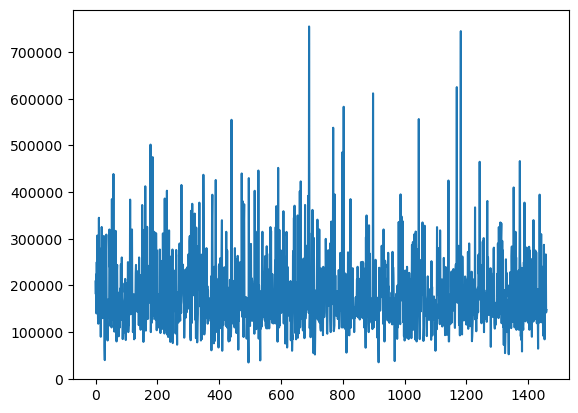

In [7]:
train["SalePrice"].plot.line()

In [3]:
train_cleaned = train.dropna(axis=1, thresh=len(train) - 200)


In [4]:
train_cleaned_encoded = pd.get_dummies(train_cleaned, drop_first=True)
train_cleaned_encoded

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,False,True,False,False,False,True,False
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,False,True,False,False,False,True,False
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,False,True,False,False,False,True,False
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,False,True,False,False,False,False,False
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,...,False,False,False,False,True,False,False,False,True,False
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,...,False,False,False,False,True,False,False,False,True,False
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,...,False,False,False,False,True,False,False,False,True,False
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,False,False,False,False,True,False,False,False,True,False


In [5]:
train_cleaned_encoded.drop(["Id"],axis = 1, inplace= True)
# 计算特征与目标特征的相关性矩阵
correlation_matrix = train_cleaned_encoded.corr()

# 查看目标特征与其他特征的相关性
target_correlation = correlation_matrix['SalePrice']
target_correlation

MSSubClass              -0.084284
LotArea                  0.263843
OverallQual              0.790982
OverallCond             -0.077856
YearBuilt                0.522897
                           ...   
SaleCondition_AdjLand   -0.050686
SaleCondition_Alloca    -0.015525
SaleCondition_Family    -0.046480
SaleCondition_Normal    -0.153990
SaleCondition_Partial    0.352060
Name: SalePrice, Length: 229, dtype: float64

In [6]:
filtered_correlations = target_correlation[abs(target_correlation) >= 0.1]


In [12]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook_connected" 

title = 'Correlation Analysis'
xaxis_title = 'Features'
yaxis_title = 'Feature Correlation'
font_size = 20
width = 1300
height = 800

fig = go.Figure(layout={"template": "plotly_white"})

fig.add_trace(go.Bar(x=filtered_correlations.index,y=filtered_correlations.values))


fig.update_yaxes(rangemode="tozero")

fig.update_layout(
    ######################## 图例设置 #############################
    title=title,
    width=width,
    height=height,
    legend=dict(x=1, y=1,  # 设置图例的位置，[0,1]之间
                font=dict(family='Times New Roman', size=15, color='black'),  # 设置图例的字体及颜色
                bordercolor="Black",
                borderwidth=0.5),
    xaxis=dict(mirror=True,
              ticks='outside',
              showline=True,
              showgrid=True,
              linewidth=1, linecolor='black',
              ),
    yaxis=dict(mirror=True,
              ticks='outside',
              showline=True,
              showgrid=True,
              tick0=0,
              linecolor='black'),
    xaxis_title=xaxis_title,  # X轴标题文本
    yaxis_title=yaxis_title,  # Y轴标题文本
    #     legend_title="Legend Title",      # 图例标题文本
    font=dict(
        family="Times New Roman",  # 所有标题文字的字体
        size=font_size,  # 所有标题文字的大小
        color="black"  # 所有标题的颜色
    ),
    xaxis_title_font_family='Times New Roman',  # 额外设置x轴标题的字体
    yaxis_title_font_color='black',  # 额外将y轴的字体设置为红色
)
fig.write_html("./Correlation.html")